# Iris Flower Classification

# Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
import warnings

# Exploring Data

In [2]:
data = pd.read_csv("C:\\Users\\Sai Malla\\Downloads\\archive (1)\\IRIS.csv")
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [17]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Visualizing the Data

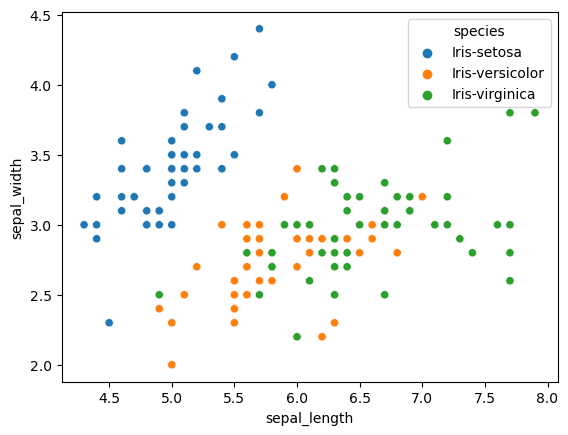

In [6]:
sns.scatterplot(x="sepal_length",y="sepal_width",hue="species",data=data)
plt.show()

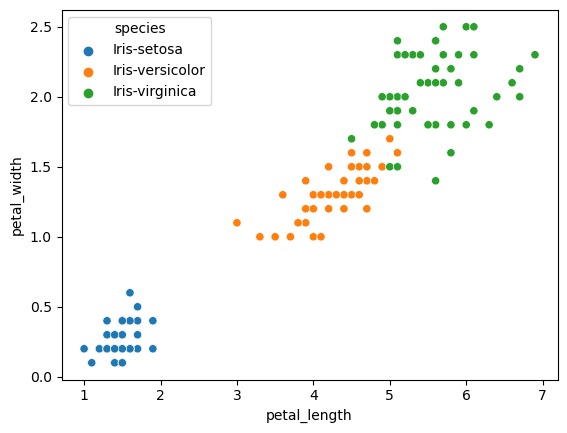

In [7]:
sns.scatterplot(x="petal_length",y="petal_width",hue="species",data=data)
plt.show()

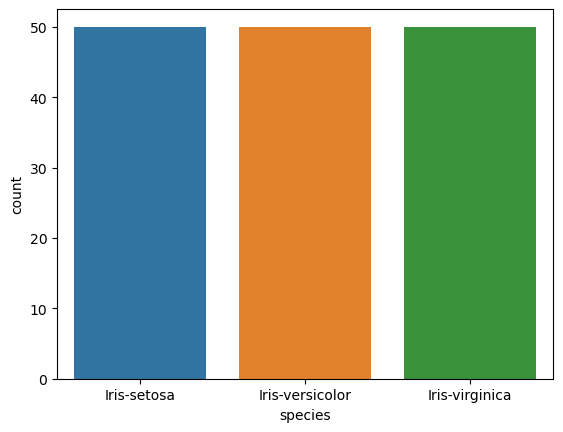

In [8]:
sns.countplot(data=data,x="species")
plt.show()

# Label Encoding

In [9]:
data['species']=LabelEncoder().fit_transform(data['species'])

In [10]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [11]:
data.tail(10)


,sepal_length,sepal_width,petal_length,petal_width,species
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Classification Of Data

In [12]:
x=data[['sepal_length','sepal_width','petal_length','petal_width']]
y=data['species']

# Data Splitting and applying model

In [13]:
warnings.filterwarnings('ignore')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=LogisticRegression()

model.fit(x_train,y_train)

y_pred=model.predict(x_test)

# Checking the prediction

In [14]:
warnings.filterwarnings('ignore')
res=model.predict([['6.5','2.9','5.5','2.6']])
if res==0:
    print("Iris-Setosa")
elif res==1:
    print("Iris-Versicolor")
elif res==2:
    print("Iris-Verginica")
else:
    print("no model found")

Iris-Verginica


# Performance Metrics

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

precision = precision_score(y_test, y_pred, average='macro')

print("Precision :",precision*100)

Accuracy: 100.0
Precision : 100.0


In [16]:
conf=confusion_matrix(y_test, y_pred)

conf

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)